<a href="https://colab.research.google.com/github/MorganGautherot/Machine_Learning_Courses/blob/master/Random_Forest_%26_boosting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Random forest

Now you have a better understanding of the decision tree. You will work with a model that can generate multiple trees and use them to obtain more accurate predictions for regression and classification.

### Preliminaries

In [16]:
# Load the library with the iris dataset
from sklearn.datasets import load_iris

# Load scikit's random forest classifier library
from sklearn.ensemble import RandomForestClassifier

# Load pandas
import pandas as pd

# Load numpy
import numpy as np

# Compute accurasy_score
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt

# Set random seed
np.random.seed(0)

### Load data

In [6]:
# Create an object called iris with the iris data
iris = load_iris()

# Create a dataframe with the four feature variables
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# View the top 5 rows
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
# Add a new column with the species names, this is what we are going to try to predict
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# View the top 5 rows
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Train Test Split

Use `train_test_split` to split your data into train and test dataset. 

If you need help feel free to check the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html).

In [8]:
from sklearn.model_selection import train_test_split

### Your code start here ###

# Use .iloc to select only X data
X = df.iloc[:, :4]

# Use pd.factorize the target value into 0, 1, 2 classes.
y = pd.factorize(df['species'])[0]

# split train test using skleanr test_size = 0.33, and random_state = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Your code end here ###

In [9]:
# Show the number of observations for the test and training dataframes
print('Number of observations in the training data:', len(X_train))
print('Number of observations in the test data:',len(X_test))

Number of observations in the training data: 100
Number of observations in the test data: 50


### Train model

In [10]:
### Your code start here ###

# Instantiate model with 1000 decision trees and random state = 42
rf = RandomForestClassifier(n_estimators = 1000, random_state = 42)

# Train the model on training data
rf.fit(X_train, y_train)

### Your code end here ###

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

### Prediction on train and test set

In [11]:
### Your code start here ###

# Use the forest's predict method on the test data
y_predict_train = rf.predict(X_train)
y_predict_test = rf.predict(X_test)

### Your code end here ###

### Compute accuracy for Training and Testing prediction

Now it's time to compute `accuracy_Score`.

Feel free to check the [doc](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) if you need more informations 

In [14]:
### Your code start here ###
accuracy_train = accuracy_score(y_train, y_predict_train)
accuracy_test = accuracy_score(y_test, y_predict_test)
### Your code end here ###

print(accuracy_train)
print(accuracy_test)

1.0
0.98


### Decision Boundary

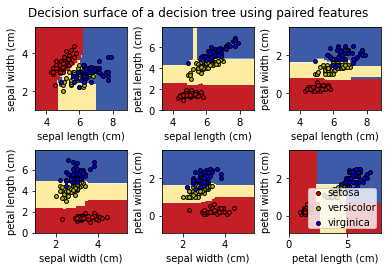

In [20]:
# Parameters
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02

# Load data
iris = load_iris()

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Train
    rf = RandomForestClassifier(n_estimators = 1000, random_state = 42).fit(X, y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = rf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

plt.suptitle("Decision surface of a random forest using paired features")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")
plt.show()